<a href="https://colab.research.google.com/github/wwwbxy123/Handwrite-recognition-CNN-model-explores-with-Pytorch-Keras-and-my-models-/blob/master/Xinyi(Blanca)_Bai_lab8a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8 Convolutional Neural Network


Name: Xinyi (Blanca) Bai ID:xb52

## 1. Pytorch Learning Curves

### prepare the model 

In this part, we explore the impact of the training dataset size on system performance. First, we train the model given in the PyTorch Tutorial with at least five different size training datasets. Then, we plot the accuracy achieved on the full test dataset for each trained model.


For the analysis of this experiment we plot the accuracy achieved on the full test dataset for each trained model. On the same graph, for each trained model, we plot the accuracy achieved with the corresponding training dataset; every graph include a legend for the two plots.

In [0]:
#install torch in google colab
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

In [11]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

0.4.1
False


In [12]:
#initialization
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
len(mnist_trainset)
print(mnist_trainset)

train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())


Processing...
Done!
Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): None
    Target Transforms (if any): None


In [0]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

In [0]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
# loade test MNIST set 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

### 1.1 experiment on 250 size trainning set

For training on 250 samples,  I reduce the batch size to 50 and in the training loop, and break after running for 5 iterations. 

In [37]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 50
learning_rate = 0.001

# Data loader

# loade trainning MNIST set 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if i > 4:
            break
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [1/1200], Loss: 0.1038
Epoch [1/5], Step [2/1200], Loss: 0.0147
Epoch [1/5], Step [3/1200], Loss: 0.0533
Epoch [1/5], Step [4/1200], Loss: 0.1303
Epoch [1/5], Step [5/1200], Loss: 0.0330
Epoch [2/5], Step [1/1200], Loss: 0.0761
Epoch [2/5], Step [2/1200], Loss: 0.0373
Epoch [2/5], Step [3/1200], Loss: 0.1423
Epoch [2/5], Step [4/1200], Loss: 0.0776
Epoch [2/5], Step [5/1200], Loss: 0.0387
Epoch [3/5], Step [1/1200], Loss: 0.0361
Epoch [3/5], Step [2/1200], Loss: 0.0608
Epoch [3/5], Step [3/1200], Loss: 0.0709
Epoch [3/5], Step [4/1200], Loss: 0.2585
Epoch [3/5], Step [5/1200], Loss: 0.0232
Epoch [4/5], Step [1/1200], Loss: 0.2701
Epoch [4/5], Step [2/1200], Loss: 0.0628
Epoch [4/5], Step [3/1200], Loss: 0.1828
Epoch [4/5], Step [4/1200], Loss: 0.0443
Epoch [4/5], Step [5/1200], Loss: 0.0405
Epoch [5/5], Step [1/1200], Loss: 0.1535
Epoch [5/5], Step [2/1200], Loss: 0.0321
Epoch [5/5], Step [3/1200], Loss: 0.0860
Epoch [5/5], Step [4/1200], Loss: 0.0752
Epoch [5/5], Ste

In [38]:
# Test the model on MNIST dataset
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of 250 images trained model on the MNIST fulltestset: {} %'.format(100 * correct / total))

Test Accuracy of 250 images trained model on the MNIST fulltestset: 97.34 %


### 1.2 experiment on 60000 size trainning set

In [0]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# Data loader

# loade trainning MNIST set 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.0015
Epoch [1/5], Step [200/600], Loss: 0.0092
Epoch [1/5], Step [300/600], Loss: 0.0043
Epoch [1/5], Step [400/600], Loss: 0.0006
Epoch [1/5], Step [500/600], Loss: 0.0015
Epoch [1/5], Step [600/600], Loss: 0.0000
Epoch [2/5], Step [100/600], Loss: 0.0072
Epoch [2/5], Step [200/600], Loss: 0.0016
Epoch [2/5], Step [300/600], Loss: 0.0089
Epoch [2/5], Step [400/600], Loss: 0.0002
Epoch [2/5], Step [500/600], Loss: 0.0003
Epoch [2/5], Step [600/600], Loss: 0.0029
Epoch [3/5], Step [100/600], Loss: 0.0185
Epoch [3/5], Step [200/600], Loss: 0.0102
Epoch [3/5], Step [300/600], Loss: 0.0504
Epoch [3/5], Step [400/600], Loss: 0.0001
Epoch [3/5], Step [500/600], Loss: 0.0015
Epoch [3/5], Step [600/600], Loss: 0.0012
Epoch [4/5], Step [100/600], Loss: 0.0032
Epoch [4/5], Step [200/600], Loss: 0.0030
Epoch [4/5], Step [300/600], Loss: 0.0001
Epoch [4/5], Step [400/600], Loss: 0.0010
Epoch [4/5], Step [500/600], Loss: 0.0003
Epoch [4/5], Step [600/600], Loss:

In [0]:
# Test the model on MNIST dataset
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of 60000 images trained model on the MNIST fulltestset:  {} %'.format(100 * correct / total))

Test Accuracy of 60000 images trained model on the MNIST fulltestset:  99.16 %


### 1.3 experiment on 100 size trainning set

For trainning on 100 samples, I reduce the batch size to 20 and in the training loop, and break after running for 5 iterations.

In [43]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 50
learning_rate = 0.001

# Data loader

# loade trainning MNIST set 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if i > 1:
            break
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [1/1200], Loss: 0.0722
Epoch [1/5], Step [2/1200], Loss: 0.0147
Epoch [2/5], Step [1/1200], Loss: 0.1786
Epoch [2/5], Step [2/1200], Loss: 0.1091
Epoch [3/5], Step [1/1200], Loss: 0.0816
Epoch [3/5], Step [2/1200], Loss: 0.0406
Epoch [4/5], Step [1/1200], Loss: 0.1090
Epoch [4/5], Step [2/1200], Loss: 0.0348
Epoch [5/5], Step [1/1200], Loss: 0.0416
Epoch [5/5], Step [2/1200], Loss: 0.2683


In [44]:
# Test the model on MNIST dataset
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of 100 images trained model on the MNIST fulltestset: {} %'.format(100 * correct / total))

Test Accuracy of 100 images trained model on the MNIST fulltestset: 96.96 %


I try another way to use 100 test images, I reduce the batch size to 50 and in the training loop, and break after running for 2 iterations.

### 1.4 Experiment on 500 size trainning set

For trainning on 500 samples, I reduce the batch size to 50 and in the training loop, and break after running for 10 iterations.

In [33]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 50
learning_rate = 0.001

# Data loader

# loade trainning MNIST set 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if i > 9:
            break
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [1/1200], Loss: 0.0599
Epoch [1/5], Step [2/1200], Loss: 0.0912
Epoch [1/5], Step [3/1200], Loss: 0.0453
Epoch [1/5], Step [4/1200], Loss: 0.3845
Epoch [1/5], Step [5/1200], Loss: 0.1963
Epoch [1/5], Step [6/1200], Loss: 0.0493
Epoch [1/5], Step [7/1200], Loss: 0.1884
Epoch [1/5], Step [8/1200], Loss: 0.1996
Epoch [1/5], Step [9/1200], Loss: 0.0225
Epoch [1/5], Step [10/1200], Loss: 0.0335
Epoch [2/5], Step [1/1200], Loss: 0.0984
Epoch [2/5], Step [2/1200], Loss: 0.1915
Epoch [2/5], Step [3/1200], Loss: 0.0806
Epoch [2/5], Step [4/1200], Loss: 0.1534
Epoch [2/5], Step [5/1200], Loss: 0.1624
Epoch [2/5], Step [6/1200], Loss: 0.2446
Epoch [2/5], Step [7/1200], Loss: 0.0835
Epoch [2/5], Step [8/1200], Loss: 0.0458
Epoch [2/5], Step [9/1200], Loss: 0.1156
Epoch [2/5], Step [10/1200], Loss: 0.2022
Epoch [3/5], Step [1/1200], Loss: 0.2288
Epoch [3/5], Step [2/1200], Loss: 0.1137
Epoch [3/5], Step [3/1200], Loss: 0.0117
Epoch [3/5], Step [4/1200], Loss: 0.0419
Epoch [3/5], S

In [34]:
# Test the model on MNIST dataset
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of 500 images trained model on the MNIST fulltestset {} %'.format(100 * correct / total))

Test Accuracy of 500 images trained model on the MNIST fulltestset 96.37 %


### 1.5 Experiment on 1000 size trainning set

For trainning on 1000 samples, I reduce the batch size to 50 and in the training loop, and break after running for 1 iterations.

In [25]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 50
learning_rate = 0.001

# Data loader

# loade trainning MNIST set 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if i > 19:
            break
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [1/1200], Loss: 0.2157
Epoch [1/5], Step [2/1200], Loss: 0.1117
Epoch [1/5], Step [3/1200], Loss: 0.1269
Epoch [1/5], Step [4/1200], Loss: 0.3519
Epoch [1/5], Step [5/1200], Loss: 0.4409
Epoch [1/5], Step [6/1200], Loss: 0.1794
Epoch [1/5], Step [7/1200], Loss: 0.2232
Epoch [1/5], Step [8/1200], Loss: 0.0731
Epoch [1/5], Step [9/1200], Loss: 0.0976
Epoch [1/5], Step [10/1200], Loss: 0.2520
Epoch [1/5], Step [11/1200], Loss: 0.2931
Epoch [1/5], Step [12/1200], Loss: 0.2557
Epoch [1/5], Step [13/1200], Loss: 0.2141
Epoch [1/5], Step [14/1200], Loss: 0.1530
Epoch [1/5], Step [15/1200], Loss: 0.1124
Epoch [1/5], Step [16/1200], Loss: 0.1799
Epoch [1/5], Step [17/1200], Loss: 0.3999
Epoch [1/5], Step [18/1200], Loss: 0.1780
Epoch [1/5], Step [19/1200], Loss: 0.2943
Epoch [1/5], Step [20/1200], Loss: 0.1722
Epoch [2/5], Step [1/1200], Loss: 0.3431
Epoch [2/5], Step [2/1200], Loss: 0.1553
Epoch [2/5], Step [3/1200], Loss: 0.1118
Epoch [2/5], Step [4/1200], Loss: 0.1381
Epoch

In [26]:
# Test the model on MNIST dataset
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy of 1000 images trained model on the MNIST fulltestset: {} %'.format(100 * correct / total))


Test Accuracy of 1000 images trained model on the MNIST fulltestset: 96.81 %


### Discussion and plot

#### The accuracy achieved on the full test MNIST dataset for each trained model is:


Test Accuracy of 100 images trained model on the MNIST fulltestset: 96.96 %

Test Accuracy of 250 images trained model on the MNIST fulltestset: 97.34 %

Test Accuracy of 500 images trained model on the MNIST fulltestset: 96.37 %

Test Accuracy of 1000 images trained model on the MNIST fulltestset: 95.08 %

Test Accuracy of 60000 images trained model on the MNIST fulltestset:  99.16 %

In conclusion, In a large range, as the increase of the trainning dataset, the test accuracy increases.

#### The accuracy of trainning

Trainning Accuracy of 100 images trained model : (1- 0.2683) * 100% = 73.17%

Trainning Accuracy of 250 images trained model: (1- 0.2405) * 100% = 75.95% 

Trainning Accuracy of 500 images trained model: (1- 0.1797) * 100% = 82.03%

Trainning Accuracy of 1000 images trained model: (1- 0.0683) * 100% = 93.17%

Trainning Accuracy of 60000 images trained model : (1- 0.0007) * 100% = 99.93%

In conclusion, In a large range, as the increase of the trainning dataset, the train accuracy increases.

#### The learning curve

No handles with labels found to put in legend.


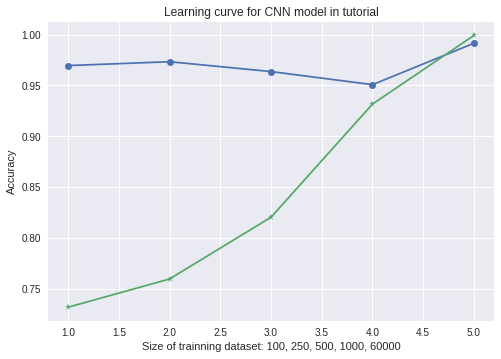

In [76]:
import matplotlib.pyplot as plt
trainSet = [100, 250, 500, 1000, 60000]
testAccuracy = [0.9696, 0.9734, 0.9637, 0.9508, 0.9916]
trainAccuracy = [0.7317, 0.7595, 0.8203, 0.9317, 0.9993]
x = np.arange(1,6)
#plt.ylim(0.7, 1)
#plt.xlim(0,1200, 60000 )
plt.figure(1)
plt.title('Learning curve for CNN model in tutorial')
#plt.axis([100, 250, 500, 1000, 60000])
plt.plot( x, testAccuracy, marker='o')
plt.plot( x, trainAccuracy, marker='*')
plt.xlabel('Size of trainning dataset: 100, 250, 500, 1000, 60000')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Discussion

Because the range of my train dataset is so large, it range from 100 to 60000, and there is no train dataset between 1200-59000, so to make the dot distribute more clear in my line graph, I change the X axis, the correct X value of every dot  is in the legend of X axis.   

In conclusion, In a large range, as the increase of the trainning dataset, both the test accuracy and the train accuracy increases.

why did the test accuracy is not absolute linear increased by the size of trainning dataset. Because I set the epoch = 1 to speed up trainning process, which make the performance of every model fluctuate much during every time I train and test.
If I increase the epoch to let it iterate more during the trainning process, the performance will be more stable.

##  2. Pytorch system evaluation

Select the best and worst performing of the trained models in part 1. For each of these models test with both the training set and my own test set.

The code of testing on my dataset is in another notebook because of some tricky issue of loading my own dataset and make dataloader,
the code of experiemnt in MNIST dataset are in part 1.
So in this part, we just discuss the test accuracy of the two models.

### 2.1 The best performing of the trained models is the 60000 images trained model.



For this model: 

the test accuracy on MNIST dataset is : 99.16 %

the test accuracy on my dataset is: 73.33333333333333 %





### 2.2 The worse performing of the trained models is the 100 images trained model.



For this model:

the test accuracy on MNIST dataset is : 96.96 %

the test accuracy on my dataset is: 66.66666666666667 %




### 2.3 The accuracy of other models on mydataset:



Test Accuracy of 100 images trained model on the my dataset: 66.66666666666667 %

Test Accuracy of 250 images trained model on the my dataset: 68.33333333333333 %

Test Accuracy of 500 images trained model on the my dataset: 70.0 %

Test Accuracy of 1000 images trained model on the my dataset: 68.33333333333333 %

Test Accuracy of 60000 images trained model on the my dataset: 73.33333333333333 %


### 2.4 learning curve for my testset and discussion

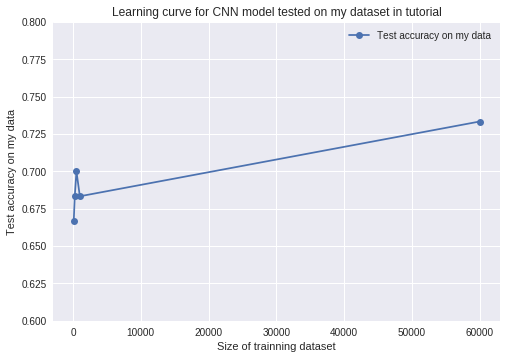

In [50]:
import matplotlib.pyplot as plt
trainSet = [100, 250, 500, 1000, 60000]
mytestAccuracy = [0.6667, 0.6833, 0.70, 0.6833, 0.7333]

plt.ylim(0.6, 0.8)
#plt.xlim(0,1200, 60000 )
plt.figure(1)
plt.title('Learning curve for CNN model tested on my dataset in tutorial')
plt.plot(trainSet, mytestAccuracy, marker='o', label='Test accuracy on my data')
plt.xlabel('Size of trainning dataset')
plt.ylabel('Test accuracy on my data')
plt.legend()
plt.show()


In conclusion, In a large range, as the increase of the trainning dataset, both the test accuracy on my data set and on MNIST dataset increases.

## 3. Keras model design


We explore different model designs using the Keras framework.

### Prepare the 1st model in tutorial

In [2]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#build 1st model according to tutorial
model = Sequential()
#add layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss for model in tutorial:', score[0])
print('Test accuracy for model in tutorial:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2638 - acc: 0.9192 - val_loss: 0.0592 - val_acc: 0.9796
Test loss for model in tutorial: 0.05922309949898626
Test accuracy for model in tutorial: 0.9796


### 3.1 Show a confusion matrix for the result of the model in the tutorial.

#### 3.1.1 Show the unnormalized confusion matrix for the result of the model in the tutorial.

In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(y_test, axis=1)

print("y_predicted_values", y_pred)
print("Y_test_values", Y_test)

y_predicted_values [7 2 1 ... 4 5 6]
Y_test_values [7 2 1 ... 4 5 6]


In [0]:
#import matplotlib.pyplot as plt 
cfm = confusion_matrix(Y_test, y_pred)
print (cfm)

#plt.imshow(cfm)
#plt.title('My title')
#plt.xlabel('categories')
#plt.ylabel('values')
#plt.show()

[[ 975    0    1    0    0    1    2    1    0    0]
 [   0 1130    1    2    0    0    1    0    1    0]
 [   2    3 1019    1    1    0    0    6    0    0]
 [   0    0    3  994    0    5    0    5    2    1]
 [   0    0    2    0  964    0    4    0    2   10]
 [   1    0    1    5    0  880    2    1    1    1]
 [   8    3    0    0    4    5  938    0    0    0]
 [   1    3   14    2    0    0    0 1001    2    5]
 [   6    1    6    2    4    4    2    4  940    5]
 [   3    5    0    3    5    5    0    5    3  980]]


#### 3.1.2 Show normalized confusion matrix for the result of the model in the tutorial.

Normalized confusion matrix


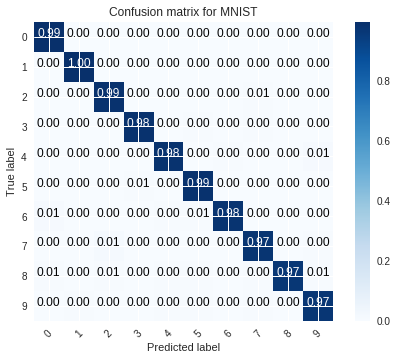

In [0]:
## A more elegant preserntation for a confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
    plt.show()

plot_confusion_matrix(cfm, classes=range(10), normalize=True,
                      title='Confusion matrix for MNIST')

### 3.2 CNN model with batch normalization and image standardization 

#### 3.2.1 only batch normalization

##### add one batch norm layer

In [0]:
#build model2 with batch norm 
model2 = Sequential()
#add layer

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# add batch norm layer
model2.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss for model in tutorial with batch norm:', score[0])
print('Test accuracy for model in tutorial with batch norm::', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 227s 4ms/step - loss: 0.3143 - acc: 0.9051 - val_loss: 0.0534 - val_acc: 0.9822
Test loss for model in tutorial with batch norm: 0.05342521703434177
Test accuracy for model in tutorial with batch norm:: 0.9822


##### add two batch norm layer

In [0]:
#build model22 with 2 batch norm layer
model22 = Sequential()
#add layer

model22.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# add batch norm layer
model22.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model22.add(Conv2D(64, (3, 3), activation='relu'))
model22.add(MaxPooling2D(pool_size=(2, 2)))
model22.add(Dropout(0.25))
model22.add(Flatten())
model22.add(Dense(128, activation='relu'))
model22.add(Dropout(0.5))

# add batch norm layer
model22.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model22.add(Dense(num_classes, activation='softmax'))
model22.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model22.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model22.evaluate(x_test, y_test, verbose=0)
print('Test loss for model in tutorial with 2 batch norm layers:', score[0])
print('Test accuracy for model in tutorial with 2 batch norm layers:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 228s 4ms/step - loss: 0.1996 - acc: 0.9459 - val_loss: 0.0569 - val_acc: 0.9837
Test loss for model in tutorial with 2 batch norm layers: 0.05689856858402491
Test accuracy for model in tutorial with 2 batch norm layers: 0.9837


#### 3.2.2 only image standarlization

In [6]:
#build model3 according to tutorial

#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler  
#x_train2d = x_train.reshape(x_train.shape[0], 784)
#x_test2d = x_test.reshape(x_test.shape[0], 784)
#scaler = StandardScaler()  
# fit only on training data
#scaled_x_train = scaler.fit_transform(x_train2d) / 255
# apply same transformation to test data
#scaled_x_test = scaler.transform(x_test2d) / 255

import numpy as np

#standardlize
testmean= np.mean(x_test)
teststd= np.std(x_test, axis = 0)
scaled_x_test = (x_test - testmean) / teststd

trainmean= np.mean(x_train)
trainstd= np.std(x_test, axis = 0)
scaled_x_train = (x_train - trainmean) / trainstd

#build model with image standarlization
model3 = Sequential()
#add layer

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model3.fit(scaled_x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(scaled_x_test, y_test))

score = model3.evaluate(scaled_x_test, y_test, verbose=0)
print('Test loss for model in tutorial with image standardlization:', score[0])
print('Test accuracy for model in tutorial with image standardlization:', score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 167s 3ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Test loss for model in tutorial with image standardlization: nan
Test accuracy for model in tutorial with image standardlization: 0.098


Why dose my loss shows NAN:

Because I choosed a not proper batch size, the batch size I choose equals to Its minimum, which is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around.

#### 3.2.2 use both image standarlization and batch normalization

In [0]:
#build model4 according to tutorial

import numpy as np

#standardlize
testmean= np.mean(x_test)
teststd= np.std(x_test, axis = 0)
scaled_x_test = (x_test - testmean) / teststd

trainmean= np.mean(x_train)
trainstd= np.std(x_test, axis = 0)
scaled_x_train = (x_train - trainmean) / trainstd


#build model with image standarlization
model4 = Sequential()
#add layer

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# add batch norm layer
model4.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model4.fit(scaled_x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(scaled_x_test, y_test))

score = model4.evaluate(scaled_x_test, y_test, verbose=0)
print('Test loss for model in tutorial with image standardlization and batch norm:', score[0])
print('Test accuracy for model in tutorial with image standardlization and batch norm:', score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 227s 4ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Test loss for model in tutorial with image standardlization and batch norm: nan
Test accuracy for model in tutorial with image standardlization and batch norm: 0.098


### Discussion

We use the test accuracy as the metrix to evaluate the performance of the model we build. 

We find that to increase the performance, the batch norm layer is better to add between conv layers or near the output layer, but before the dense layer.
Through my experiment on adding different numbers of batch norm layer, I find my model with 2 batch norm layer will be better than my model with only one batch norm layer. And the first batch norm layer I add between the two conv layer, the second I add before the last dense layer near the output layer.

Main parameters of my batch norm layer is: axis=-1, momentum=0.99, epsilon=0.001

Sometimes batch norm layer will destroy the model, especially when we do batch norm before the first conv layer or in the output layer.

For the **reason**, we can think that the batch norm will be some kind of adaptive (or learnable) pre-processing block with trainable parameters. Which also means that we need to back-propagate them.

Here is the list of advantages of using Batch-Norm:

1. Improves gradient flow, used on very deep models (Resnet need this)
2. Allow higher learning rates
3. Reduce dependency on initialization
4. Gives some kind of regularization (Even make Dropout less important but keep using it)
5. As a rule of thumb if you use Dropout+BatchNorm you don't need L2 regularization

For standarlization: 
A strange value is my loss, which is NAN, I think it probabily because I choosed a not proper batch size, or my epoch is so low that only equals 1, so the loss may jump around.

### 3.3 CNN model with a new convolution layer to the model in the tutorial

In [0]:
#build model5 according to tutorial

model5 = Sequential()
#add layer
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss for model I add a new conv layer and pool layer:', score[0])
print('Test accuracy for model I add a new conv layer and pool layer:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 185s 3ms/step - loss: 0.2751 - acc: 0.9123 - val_loss: 0.0513 - val_acc: 0.9839
Test loss for model in tutorial: 0.051303200916352217
Test accuracy for model in tutorial: 0.9839


### Discussion

 We add another convolutional + max pooling layer, with 64 output channels.  The default strides argument in the Conv2D() function is (1, 1) in Keras, so we can leave it out.  The default strides argument in Keras is to make it equal ot the pool size, so again, we can leave it out.
 
 This model contains 10 layers: a conv layer with 3X3 kernal; a conv layer with 3X3 kernal; a pooling layer; a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(128) layer; a dropout(0.5) layer; a dense layer. 

Test accuracy for this model is : 0.9839
Train accuracy for this model is : 0.4870

### 3.4  Modify the model to improve performance

 Modify the model in any way  and see how much you can improve the performance. Include a table in this report which list which hyperparameter settings you explored and the associated performance. Show a confusion matrix for your best trained model.

#### model6 with a new conv layer with 3X3 kernal, and a pooling layer, also two batch norm layers.

In [54]:
#build model6 according to tutorial

model6 = Sequential()
#add layer
model6.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model6.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))

# add batch norm layer
model6.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel6:', score[0])
print('Test accuracy for mymodel6:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 254s 4ms/step - loss: 0.2328 - acc: 0.9341 - val_loss: 0.0458 - val_acc: 0.9855
Test loss for mymodel6: 0.045837517319526525
Test accuracy for mymodel6: 0.9855


This model contains 12 layers: a conv layer with 3X3 kernal; a batch norm layer; a conv layer with 3X3 kernal; a pooling layer;  a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(128) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.9855

Train accuracy for this model is : 0.9542

#### model7: revise kernal as 5X5

In [0]:
#build model7 according to tutorial

model7 = Sequential()
#add layer
model7.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model7.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model7.add(Conv2D(64, (5, 5), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model7.add(Conv2D(64, (5, 5), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Dropout(0.25))
model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5))

# add batch norm layer
model7.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel7:', score[0])
print('Test accuracy for mymodel7:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 338s 6ms/step - loss: 0.2866 - acc: 0.9180 - val_loss: 0.0673 - val_acc: 0.9794
Test loss for mymodel6: 0.06725342419473454
Test accuracy for mymodel6: 0.9794


This model contains 12 layers: a conv layer with 5X5 kernal; a batch norm layer; a conv layer with 5X5 kernal; a pooling layer;  a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(128) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.9794

Train accuracy for this model is : 0.9327

#### model8: revise dense layer, set dense as 1000

In [0]:
#build model8 according to tutorial

model8 = Sequential()
#add layer
model8.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model8.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Dropout(0.25))
model8.add(Flatten())
model8.add(Dense(1000, activation='relu'))
model8.add(Dropout(0.5))

# add batch norm layer
model8.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel8:', score[0])
print('Test accuracy for mymodel8:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 281s 5ms/step - loss: 0.1343 - acc: 0.9586 - val_loss: 0.0519 - val_acc: 0.9837
Test loss for mymodel6: 0.051948512578918596
Test accuracy for mymodel6: 0.9837


This model contains 12 layers: a conv layer with 3X3 kernal; a batch norm layer; a conv layer with 3X3 kernal; a pooling layer;  a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(1000) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.9837
Train accuracy for this model is : 0.9481

#### model9 change dense = 5

In [0]:
#build model9 according to tutorial

model9 = Sequential()
#add layer
model9.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model9.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model9.add(Conv2D(64, (3, 3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model9.add(Conv2D(64, (3, 3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Dropout(0.25))
model9.add(Flatten())
model9.add(Dense(5, activation='relu'))
model9.add(Dropout(0.5))

# add batch norm layer
model9.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model9.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel9:', score[0])
print('Test accuracy for mymodel9:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 256s 4ms/step - loss: 1.7585 - acc: 0.3550 - val_loss: 1.0611 - val_acc: 0.8668
Test loss for mymodel9: 1.0610666137695313
Test accuracy for mymodel9: 0.8668


This model contains 12 layers: a conv layer with 3X3 kernal; a batch norm layer; a conv layer with 3X3 kernal; a pooling layer;  a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(5) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.8668


#### model10 change dense = 64

In [0]:
#build model0 according to tutorial

model0 = Sequential()
#add layer
model0.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model0.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))

model0.add(Dropout(0.25))
model0.add(Flatten())
model0.add(Dense(64, activation='relu'))
model0.add(Dropout(0.5))

# add batch norm layer
model0.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model0.add(Dense(num_classes, activation='softmax'))

model0.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model0.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel0:', score[0])
print('Test accuracy for mymodel0:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 261s 4ms/step - loss: 0.6410 - acc: 0.8219 - val_loss: 0.0699 - val_acc: 0.9819
Test loss for mymodel0: 0.06985671087801457
Test accuracy for mymodel0: 0.9819


This model contains 12 layers: a conv layer with 3X3 kernal; a batch norm layer; a conv layer with 3X3 kernal; a pooling layer;  a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(64) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.9819

Train accuracy for this model is : 0.9302

#### model11 change third conv2d = 128

In [0]:
#build model11 according to tutorial

model11 = Sequential()
#add layer
model11.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# add batch norm layer
model11.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))

model11.add(Conv2D(64, (3, 3), activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))

# add conv layer and pooling layer
model11.add(Conv2D(128, (3, 3), activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))

model11.add(Dropout(0.25))
model11.add(Flatten())
model11.add(Dense(5, activation='relu'))
model11.add(Dropout(0.5))

# add batch norm layer
model11.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))


model11.add(Dense(num_classes, activation='softmax'))

model11.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model11.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss for mymodel11:', score[0])
print('Test accuracy for mymodel11:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 294s 5ms/step - loss: 1.7756 - acc: 0.3326 - val_loss: 0.8206 - val_acc: 0.8767
Test loss for mymodel11: 0.8206356763839722
Test accuracy for mymodel11: 0.8767


This model contains 12 layers: a conv layer with 3X3 kernal; a batch norm layer; a conv layer with 3X3 kernal; a pooling layer; a conv layer with 3X3 kernal; a pooling layer; a Dropout(0.25) layer; a flatten layer; a dense(128) layer; a dropout(0.5) layer; a batch norm layer; a dense layer. 

Test accuracy for this model is : 0.8206

### Table of my hyperparameter settings and the associated performance

All these models are trained with 60000 train samples in MNIST dataset, 
and tested with 10000 test samples in MNIST dataset.

 batch_size = 128; num_classes = 10; epochs = 1


| layer composition and hyperparameter      |        |        |     |   |
|------------------------------------------|-------:|-------:|----:|--:|
| conv(32, kernel 3X3)                     |    3X3   |    3X3   | 5X5 |  3X3 | 3X3|3X3|3X3|3X3|
| batch norm(momentum=0.99, epsilon=0.001) |    ✓   |   ✘     |  ✓   | ✓  | ✓|✓|✓| ✓|
| conv(64, kernel 3X3)                     | ✓      | ✓      | ✓    | ✓  |✓|✓|✓|✓|
| pooling(2X2)                            | ✓      |    ✓   |   ✓  |  ✓ |✓|✓|✓|✓|
| conv(64, kernel 3X3)                     |    3X3   | 3X3      | 5X5     |  3X3 |3X3|3X3|3X3|✘ |
| pooling(2X2)                            |    ✓   |    ✓   |  ✓   | ✓  |✓|✓|✓|✘ |
| dropout(0.25)                            |    ✓   |    ✓   | ✓    | ✓  |✓|✓|✓|✓|
| flatten                                  |    ✓   |    ✓   |  ✓   | ✓  |✓|✓|✓|✓|
| dense(128)                               |    128   |    128   |  128   | 1000  |5|64|11|128|
| dropout(0.5)                             |    ✓   |    ✓   |  ✓   |  ✓ |✓|✓|✓|✓|
| batch norm(momentum=0.99, epsilon=0.001) |    ✓   |   ✘     |  ✓   | ✓  |✓|✓|✓|✘ |
| dense                                    |    ✓   |    ✓   |  ✓   |  ✓ |✓|✓|✓|✓|
|    Test Accuracy on MNIST 1000testset    | 0.9855 | 0.9839 |    0.9794 | 0.9837  |0.8668|0.9819|0.8266|0.9822|


We use the test accuracy as the metrix to evaluate the performance of the model we build with the change of hyperparameter. 

We find that batch norm layer is better to add between conv layers or near the output layer, but before the dense layer, and properly add batch norm layer will increase the performance. Model with two batch norm layers will performs batter than model with one batch norm layer.

Then, for the kernal size in conv layer, 3X3 is enough for this classification experiment on MNIST dataset. 5X5 is so large that decreased the performance.
The kernel size generally refers to the widthxheight of the filter mask. The max pooling layer, for example, returns the pixel with maximum value from a set of pixels within a mask (kernel). Very small kernal sizes will capture very fine details of the image. On the other hand having a bigger kernal size will leave out minute details in the image.

For dense layer: 128 is quite good, we have tried 5, 11, 64, 1000, we find slightly increase th dense  or make the dense really big, such as 1000, which won't make a big difference on the performance, but if the dense is so low, it decrease the performance severely. A dense layer we can understand it as a  regular layer of neurons in a neural network.

For pooling layer: 2X2 is good for this experiment.
Pooling layer It is also referred to as a downsampling layer. In this category, there are also several layer options, with maxpooling being the most popular. This basically takes a filter (normally of size 2x2) and a stride of the same length. It then applies it to the input volume and outputs the maximum number in every subregion that the filter convolves around.

For dropout layer: I have two drop out layers in my model, both of them are after the conv and pooling layer, one dropout value is 0.25, another is 0.5, which are good choices. Dropout is a a technique used to tackle Overfitting . The Dropout method in keras.layers module takes in a float between 0 and 1, which is the fraction of the neurons to drop.

For batch size: My choice of 128 is a good guess. Both give us a not bad loss and a reasonalble tranning speed. Batch size determines the number of samples in each mini batch.

For epoch: My choice of 1 is not a good guess. I choose 1 only because of the trainning speed is so slow. 


### Confusion matrix for my best model

My best model is model6, I add a batch norm layer with (momentum=0.99, epsilon=0.001) after the 1st conv layer, then  I add a new conv layer with Conv2D(64, (3, 3 )and pooling layer with pool size (2,2) after the batch layer, 

In [55]:
from sklearn.metrics import confusion_matrix
import numpy as np

Y_pred = model6.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(y_test, axis=1)

print("y_predicted_values", y_pred)
print("Y_test_values", Y_test)

#import matplotlib.pyplot as plt 
cfm = confusion_matrix(Y_test, y_pred)

print (cfm)

y_predicted_values [7 2 1 ... 4 5 6]
Y_test_values [7 2 1 ... 4 5 6]
[[ 973    0    4    0    0    1    1    1    0    0]
 [   0 1127    3    4    0    1    0    0    0    0]
 [   0    1 1027    2    0    0    0    1    1    0]
 [   0    0    5  997    0    6    0    1    1    0]
 [   1    1    3    0  967    0    4    0    3    3]
 [   1    0    1    4    0  884    1    1    0    0]
 [   5    2    1    1    1    8  940    0    0    0]
 [   0    2   17    3    0    1    0 1003    1    1]
 [   2    1    4    2    1    1    0    2  956    5]
 [   4    3    0    2    3    8    0    6    2  981]]


Normalized confusion matrix


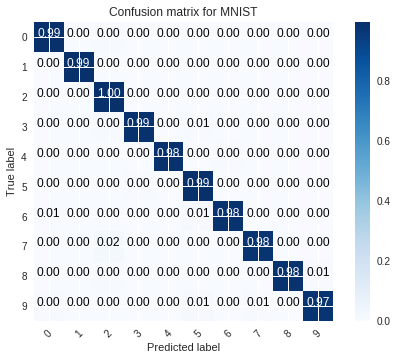

In [61]:
## A more elegant preserntation for a confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
    plt.show()

plot_confusion_matrix(cfm, classes=range(10), normalize=True,
                      title='Confusion matrix for MNIST')

### DIscussion

We use the test accuracy as the metrix to evaluate the performance of the model we build. 

**For batch norm layer** :

We find that to increase the performance, the batch norm layer is better to add between conv layers or near the output layer, but before the dense layer.
Through my experiment on adding different numbers of batch norm layer, I find my model with 2 batch norm layer will be better than my model with only one batch norm layer. And the first batch norm layer I add between the two conv layer, the second I add before the last dense layer near the output layer.

Main parameters of my batch norm layer is: axis=-1, momentum=0.99, epsilon=0.001

Sometimes batch norm layer will destroy the model, especially when we do batch norm before the first conv layer or in the output layer.

For the reason, we can think that the batch norm will be some kind of adaptive (or learnable) pre-processing block with trainable parameters. Which also means that we need to back-propagate them.

Here is the list of advantages of using Batch-Norm:

1. Improves gradient flow, used on very deep models (Resnet need this)
2. Allow higher learning rates
3. Reduce dependency on initialization
4. Gives some kind of regularization (Even make Dropout less important but keep using it)
5. As a rule of thumb if you use Dropout+BatchNorm you don't need L2 regularization

**For kernal size in conv layer**:  

3X3 is enough for this classification experiment on MNIST dataset. 5X5 is so large that decreased the performance.
The kernel size generally refers to the widthxheight of the filter mask. The max pooling layer, for example, returns the pixel with maximum value from a set of pixels within a mask (kernel). Very small kernal sizes will capture very fine details of the image. On the other hand having a bigger kernal size will leave out minute details in the image.

**For dense layer**:

128 is quite good, we have tried 5, 11, 64, 1000, we find slightly increase th dense  or make the dense really big, such as 1000, which won't make a big difference on the performance, but if the dense is so low, it decrease the performance severely.

A dense layer we can understand it as a  regular layer of neurons in a neural network. Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a. The following is te docstring of class Dense from the keras documentation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer.

**For pooling layer**:

2X2 is good for this experiment.
Pooling layer It is also referred to as a downsampling layer. In this category, there are also several layer options, with maxpooling being the most popular. This basically takes a filter (normally of size 2x2) and a stride of the same length. It then applies it to the input volume and outputs the maximum number in every subregion that the filter convolves around.

**For dropout layer**:
I have two drop out layers in my model, both of them are after the conv and pooling layer, one dropout value is 0.25, another is 0.5, which are good choices.

Dropout is a a technique used to tackle Overfitting . The Dropout method in keras.layers module takes in a float between 0 and 1, which is the fraction of the neurons to drop. Below is the docstring of the Dropout method from the documentation:

Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

**For batch size**:

My choice of 128 is a good guess. Both give us a not bad loss and a reasonalble tranning speed.

batch size determines the number of samples in each mini batch. Its maximum is the number of all samples, which makes gradient descent accurate, the loss will decrease towards the minimum if the learning rate is small enough, but iterations are slower. Its minimum is 1, resulting in stochastic gradient descent: Fast but the direction of the gradient step is based only on one example, the loss may jump around.

**For epoch**:

My choice of 1 is not a good guess. I choose 1 only because of the trainning speed is so slow. 

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.



**All in all,** there is no way to determine a good network topology just from the number of inputs and outputs. It depends critically on the number of training examples and the complexity of the classification you are trying to learn. A scientist  Yoshua Bengio has proposed a very simple rule:

Just keep adding layers until the test error does not improve anymore.

This rule is in accordance with my results, I add one more conv layer and pooling layer, the permormance of my model increases.